In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

df = pd.read_csv("ykt_jyrz_lishi.txt",sep = ";", encoding = 'utf8')
df=df[['XH','JYSJ','JYDD']]
df=df.loc[df['JYDD'].isin(['西山浴室','开发区浴室'])]

df=df[['XH','JYSJ']]
df['JYSJ'],df['SJ'] = df['JYSJ'].str.split(' ',1).str
df['SJ'],df['H']=df['SJ'].str.split(':',1).str

df=df[['XH','SJ']]
df.to_csv('bath.csv',encoding='utf-8',index=False)

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

df = pd.read_csv("ykt_jyrz_lishi.txt",sep = ";", encoding = 'utf8')
df=df[['XH','JYSJ','JYDD']]
df=df.loc[df['JYDD'].isin(['西山浴室','开发区浴室'])]

df=df[['XH','JYSJ']]

df['JYSJ'],df['SJ'] = df['JYSJ'].str.split(' ',1).str
df['SJ'],df['H']=df['SJ'].str.split(':',1).str
df=df[['XH','JYSJ','SJ']]
df = df.drop_duplicates()
df=df[['XH','SJ']]
# print(df)
df.to_csv('xhsj.csv',encoding='utf-8',index=False)


In [5]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

df = pd.read_csv("xhsj.csv",encoding = 'utf8')
df=df.groupby(by='XH').std()
df=df.dropna()
df=df[:-2]
# print(df)
df.to_csv('bathstd.csv',header=None,encoding='utf-8')

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib

# 合并
df_3 = pd.read_csv("bathstd.csv", names=['xh','count'],encoding = 'utf8')
df_4 = pd.read_csv("softwaregrade.csv",encoding = 'utf8')

result=pd.merge(df_3,df_4) # 默认取交集

# print(result)
result.to_csv('bathgrade.csv', index=False,encoding='utf-8')


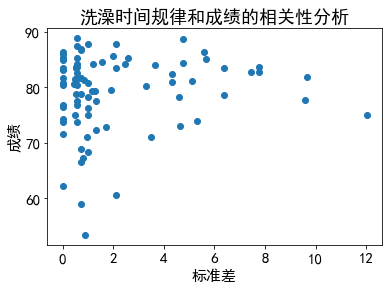

洗澡时间规律和成绩的相关系数为： 0.08835942289867793


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import mpl_toolkits.mplot3d

df = pd.read_csv("bathgrade.csv", encoding = 'utf8')

matplotlib.rcParams['font.family'] = 'SimHei' #配置中文字体
matplotlib.rcParams['font.size'] =  15   # 更改默认字体大小

plt.scatter(df['count'], df['kccj'])
plt.title("洗澡时间规律和成绩的相关性分析")
plt.xlabel('标准差')
plt.ylabel('成绩')

plt.show()
print("洗澡时间规律和成绩的相关系数为：",df['count'].corr(df['kccj']))


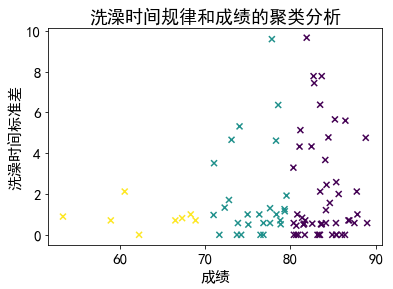

In [10]:
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("bathgrade.csv", encoding = 'utf8')
df=df[['count','kccj']]
df = df.drop(df[df['count'] > 10].index)
X=list(zip(df['kccj'],df['count']))

# Kmeans聚类
clf = KMeans(n_clusters=3)
y_pred = clf.fit_predict(X)
# print(clf)
# print(y_pred)

x = [n[0] for n in X]
# print(x)
y = [n[1] for n in X]
# print(y)

# 可视化操作
plt.rcParams['font.family'] = 'SimHei' #配置中文字体
plt.rcParams['font.size'] =  15   # 更改默认字体大小
plt.scatter(x, y, c=y_pred, marker='x')
plt.title("洗澡时间规律和成绩的聚类分析")
plt.xlabel("成绩")
plt.ylabel("洗澡时间标准差")
plt.show()